## Machine Learning Project: Predicting Student Grades

### Name: Steph Roberts

## Overview

### Machine Learning Task
In this project, we focus on developing a machine learning model aimed at predicting student performance within a large Portuguese school system. The goal is to create a regression model that can predict a student's grade based on various features extracted from student data. This model can assist the Advising Team in identifying students who may require additional support and interventions to enhance their academic outcomes.

The project involves data cleaning, preparation, and feature selection to ensure the data is suitable for analysis. Once the model is built, its performance will be evaluated using relevant metrics to determine its accuracy and effectiveness in predicting student grades.

### Approach
The workflow includes:

- **Data Exploration**: Initial analysis to understand the dataset and identify key features.
- **Data Cleaning**: Handling missing values, outliers, and any inconsistencies in the data.
- **Feature Engineering**: Creating and selecting the most relevant features for the model.
- **Model Building**: Developing and training the regression model.
- **Evaluation**: Assessing the model’s performance using metrics such as RMSE and R².


## Data Preparation

The first step in any data analysis project is to import and inspect the dataset to ensure it has been correctly loaded. This step is crucial as it lays the groundwork for all subsequent analysis and modeling.

1) **Importing the Data**: The first step in this project involved loading the dataset, which provided the foundation for our analysis. By correctly importing the data, we ensured that all subsequent operations would be based on an accurate dataset.

2) **Initial Data Inspection**: After loading the data, the next step was to inspect its structure. This involved checking the dimensions and data types to understand the nature of the dataset. This initial exploration was crucial for identifying any potential issues that might affect the analysis and for determining the best approach to data preparation.

3) **Identifying the Target Variable**: With a clear understanding of the dataset, the focus then shifted to identifying the target variable that the model would aim to predict. This step was essential for guiding the rest of the analysis and ensuring that all subsequent transformations and modeling steps aligned with the project's objectives.

4) **Data Splitting**: To prepare for model training and evaluation, the dataset was split into training and testing sets. Using an 80/20 split (`test_size=0.2`) and a `random_state` of 42, we ensured that the data was divided in a way that balanced training efficiency with model evaluation reliability. This reproducibility is key for consistent results and comparison across different model iterations.



In [52]:
# standard imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [53]:
# set the default font sizes
plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [54]:
# import the data
students = pd.read_csv('student-mat.csv')

In [55]:
# view the first few instances of our dataset
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [56]:
# check the shape of our data
students.shape

(395, 35)

The students dataset has 395 instances and 35 attributes

In [57]:
# explore the information for each variable
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

Looking at the information about each variable, we learn that there are several different data types included (objects, floats, integers). A few things stand out here already. 

There are several variables of object type that have only 2 options for responses. For example, Family size is depicted using "LE3" to represent families of less than 3 people, while "GT3" is used to represent greater than 3. Address is represented by "U" or "R" to represent urban or rural living. Pstatus (parental cohabitation) is represented by "T" or "A" for together or apart respectively. There are also several "yes or no" variables, such as "schoolsup" (extra educational support), "famsup" (family educational support), "paid" (extra paid classes), "internet" (internet access at home), etc. If any of these variable prove correlated to our outcome variable, we may need to transform them to numeric binary variables. 

Also, there appear to be a couple of variables of interger (numeric) type, but that may be misleading as the numeric type stands for a category. For example, "studytime" represents weekly study time in hours, but are represented by ordinal numbers (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours). Home to school travel time, "traveltime", is similar (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1
hour, or 4 - >1 hour). These variables may need to be transformed or reevaulated going forward to determine the proper way to accurately depict that data.

In [58]:
from sklearn.model_selection import train_test_split

# drop target column
X = students.drop(columns=['G3'])

# save target as a series
y = students['G3']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# concatenate X_train and y_train into a single DF for data exploration
train_data = pd.concat([X_train, y_train], axis=1)

By splitting our dataset into training and test sets we can explore and fit models on the training set without being influenced by the test set. The last step will be to test our chosen model on the test set and measure its performance on the "new" data. 

## Exploring the Data
Before diving into the construction of a machine learning model, it's essential to understand the dataset at hand. This exploration phase is crucial for uncovering patterns, identifying any anomalies, and gaining insights that inform the selection of features and the preprocessing steps. A thorough analysis and visualization of the data can significantly enhance the model's performance and reliability.

In this section, the focus was on:

1) **Studying Attributes**: The training set attributes were meticulously examined to understand their characteristics and potential impact on the target variable. This deep dive into the data allowed for a better grasp of the dataset's structure and helped in identifying key features that could influence the model's predictions.

2) **Visualizations**: Visualizing the data provided an effective way to explore and analyze the relationships between different variables. Various plots were generated to highlight these relationships and to identify any trends or outliers. These visualizations played a critical role in the analysis, offering clear, interpretable insights into the dataset's dynamics.

3) **Correlation Analysis**: Understanding the relationships between numeric attributes was crucial for feature selection. By analyzing the correlations, we identified which features had the strongest associations with the target variable. This step was instrumental in refining the feature set and ensuring that the model focused on the most relevant attributes.

The insights and visualizations from this exploration phase were documented and included in the Executive Summary. These visual elements not only supported the analytical findings but also provided a visual narrative that complemented the quantitative analysis.

In [59]:
# let's view the counts of a few variables
train_data["sex"].value_counts()

sex
F    170
M    146
Name: count, dtype: int64

The students in our data are fairly evenly split between genders, but there is a slightly larger female group with 170 female to 146 male students comprising our training data.

In [60]:
# view age counts
train_data["age"].value_counts()

age
16.0    81
17.0    81
18.0    61
15.0    57
19.0    21
20.0     2
22.0     1
21.0     1
Name: count, dtype: int64

Notice there are only 4 people above the age of 19. This will prove important later. 

In [61]:
# check value counts for study time
train_data["studytime"].value_counts()

studytime
2    158
1     82
3     55
4     21
Name: count, dtype: int64

The most common study time is 2-5 hours (represented by the number 2), then <2 hours (1), followed by 5-10 hours (3), and lastly > 10 hours per week (4).

In [62]:
# check the percent of students without internet access at home
round(train_data["internet"].value_counts(normalize=True)*100)

internet
yes    84.0
no     16.0
Name: proportion, dtype: float64

The majority of students have access to internet at home, with only 16% of the training data students without home internet.

In [63]:
# check how many schools are represented by the data
train_data["school"].value_counts()

school
GP    282
MS     34
Name: count, dtype: int64

There are only 2 schools - `GP` (Gabriel Pereira) and `MS` (Mousinho da Silveira) - from which the student data was gathered. A large majority of students are from Gabriel Pereira. This may serve more to continue framing the problem than it does to contribute to our machine learning model. 

In [64]:
# describe numerical attributes
train_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,305.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,305.000000,305.000000,305.000000,316.000000,316.000000,316.000000
mean,16.747541,2.734177,2.544304,1.430380,2.047468,0.335443,3.943038,3.218354,3.161392,1.500000,2.344937,3.518987,0.704918,0.704918,4.488525,10.933544,10.651899,10.325949
std,1.274188,1.080375,1.078476,0.688842,0.836258,0.735588,0.885464,1.020323,1.119480,0.903257,1.296395,1.410714,1.373435,1.373435,5.824238,3.216823,3.755930,4.590337
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000,20.000000


Describing the data informs us about the basic statistics for each variable within our training data. We can see the average age of students is about 17 years old, with 15 to 22 being the min and max reported. Mother and father education levels were reported as secondary education for most instances. The average travel time shows more than half the students travels less than 15 minutes to school. The most common study time reported is 2 to 5 hours per week. Most students have 0 past failures. Quality of family relationships is reported as a 4 out of 5, on average. The most frequent response for amount of free time after school was a 3 out of 5 on a sliding scale of "low" to "high" amount of time. The responses to going out with friends varied quite a bit, with responses evenly spanning the full 1-5 (low to high frequency) scale. The reponses for alcohol consumption show us that students have varying weekend drinking habits, but the majority reponded with the lowest possible answer for weekday drinking. However, the third quartile shows that 25% of students reported 2 or more on a sliding scale (from 1 - very low to 5 - very high) of workday drinking. On a similar scale, the reported health statuses spanned the whole range fairly evenly, but the most frequent response was 4. Absences for 1st and 2nd terms were similar with a vast majority of students have zero missed days of school, but with a max absence of 12. This could prove to be an outlier or valuable information as we explore further. Absences in the 3rd term increased and became more variant, with an average of 4 and a standard deviation of 6. The average grades for the first two terms `G1` and `G2` were 11, which is the equivalent of a "C" letter grade in the US. The grades varied a lot with the first quartile (bottom 25%) getting an "F", the only the third quartile (top 25%) earning between 13.00 - 19.00 (which spans US grades A, B, and C). 

In [65]:
# describe categorical attributes
train_data.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,282,170,247,226,284,110,178,117,219,272,191,171,159,253,298,265,207


Looking at the categorical details, we can learn a bit more. Most students have a family size of more than 3 people and report their parents are together. The most common reason for attend the school is for a certain course, but the top frequency is less than half of responses which tells us the responses are spread among other options. Most students do not have extra educational support, but do have family educational support. The `paid` variable is close to evenly split, meaning just over half the responses report "no" for having extra paid classes within the course. Extra-curricular activities is almost evenly split, with a slight majority reporting "no". Most students did attend nursery school and want to take higher education. The majority of students report not being in a romantic relationship at the time of the data collection.

In [66]:
# check the 'reason' variable percentages
round(train_data["reason"].value_counts(normalize=True)*100)

reason
course        37.0
home          27.0
reputation    26.0
other         10.0
Name: proportion, dtype: float64

A closer look at the `reason` feature shows us that 37% of students attend their school because of the course, 27% give the reason of home location, 26% report the school reputation as the reason, and 10% said "other" reason. 

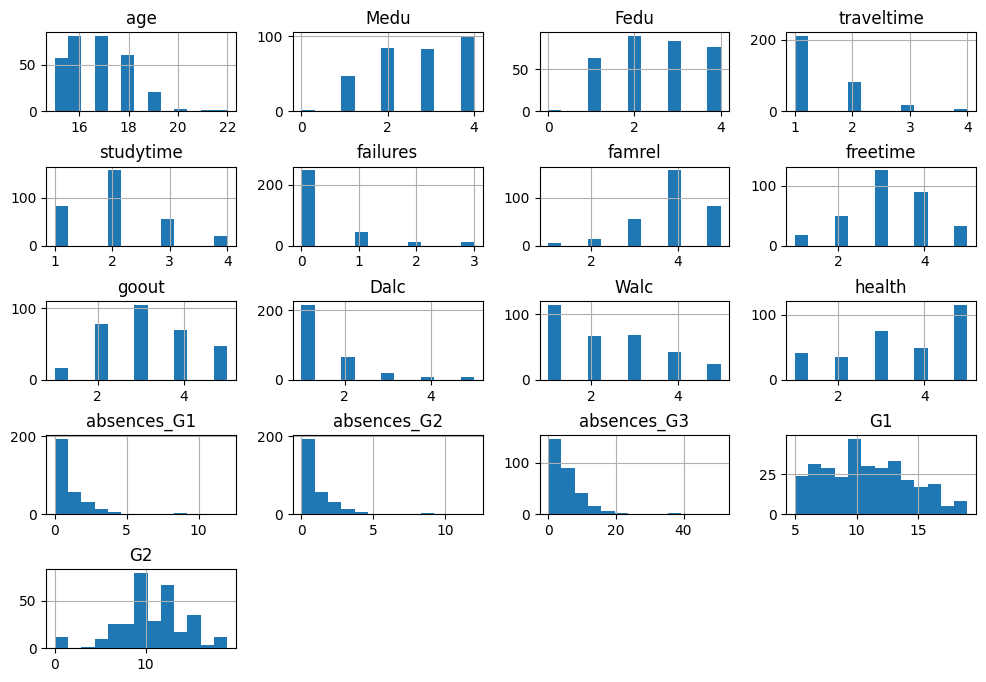

In [67]:
# plots histograms of numerical data
X_train.hist(bins=13, figsize=(12, 8))

plt.subplots_adjust(hspace=0.7)  # Adjust vertical space between plots
plt.show()

This helps us visualize what our describe function taught us. The agerave age of 17 makes sense, but it is nice to view the histogram to see that many students are 16, but the few older students are skewing the data a bit. Notice the difference between `G1` and `G2` also. The first term shows the minimum grade was a 5, while the second term had a minimum grade of 0.

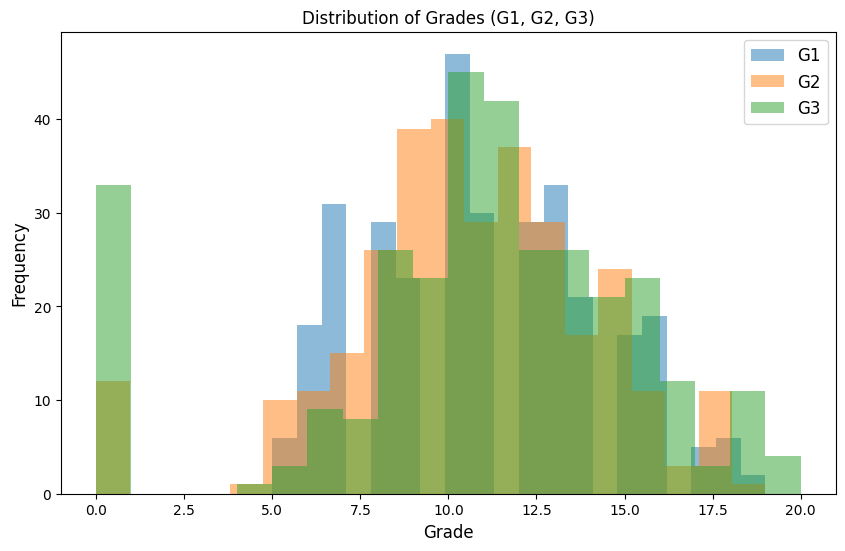

In [68]:
# check the distribution of grades for all 3 terms
plt.figure(figsize=(10, 6))
plt.hist(X_train["G1"], bins=20, alpha=0.5, label="G1")
plt.hist(X_train["G2"], bins=20, alpha=0.5, label="G2")
plt.hist(y_train, bins=20, alpha=0.5, label="G3")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.title("Distribution of Grades (G1, G2, G3)")
plt.legend(loc="upper right")
plt.show()


The grades do not vary drastically overall from term to term. However, it should be noted that the frequency of zero grades went from none in the first term, to more than 10 in the second, to more than 30 in the third. If not for the zero grades, the remaining distribution appears to improve slightly with each term. 

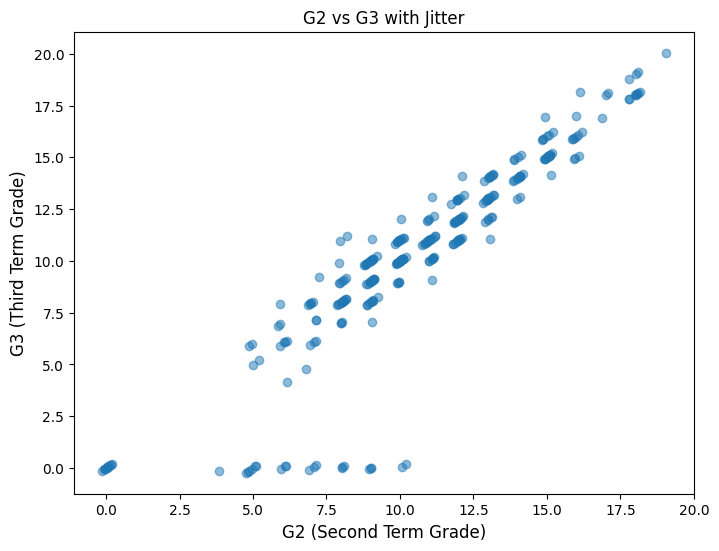

In [69]:
# create a scatterplot of 2nd to 3rd term grades

# create a small jitter to add to the data points to separate overlapping points
jitter = 0.1 * np.random.randn(len(train_data))

# scatter plot with jitter
plt.figure(figsize=(8, 6))
plt.scatter(train_data["G2"] + jitter, train_data["G3"] + jitter, alpha=0.5)
plt.xlabel("G2 (Second Term Grade)")
plt.ylabel("G3 (Third Term Grade)")
plt.title("G2 vs G3 with Jitter")
plt.show()


In gernal, these 2nd and 3rd term grade variables seem to show a positive linear relationship. However, those who earned a 0 grade in the 3rd term had varying grades in the previous between 0 to 10. 

## Correlations

In [70]:
num_cols = ['age', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences_G1', 'absences_G2', 'absences_G3', 'G1',
       'G2', 'G3']

# check correlations between numerical features and target
corr_matrix = train_data[num_cols].corr()

# view correlation coefficients
corr_matrix["G3"].sort_values(ascending=False)


G3             1.000000
G2             0.907924
G1             0.791559
studytime      0.138200
absences_G3    0.092245
famrel         0.069409
absences_G1    0.036652
absences_G2    0.036652
freetime      -0.015244
Walc          -0.057363
Dalc          -0.064698
health        -0.068857
goout         -0.106024
traveltime    -0.106752
age           -0.134519
failures      -0.373769
Name: G3, dtype: float64

Our training data correlation coefficients show that grades from the 2nd and 1st quarters (`G2`, `G1`) are tightly correlated, as one might expect. Other than previous grades, the highest correlated attributes are `failures` (although negatively correlated), `studytime`, and `age`. 

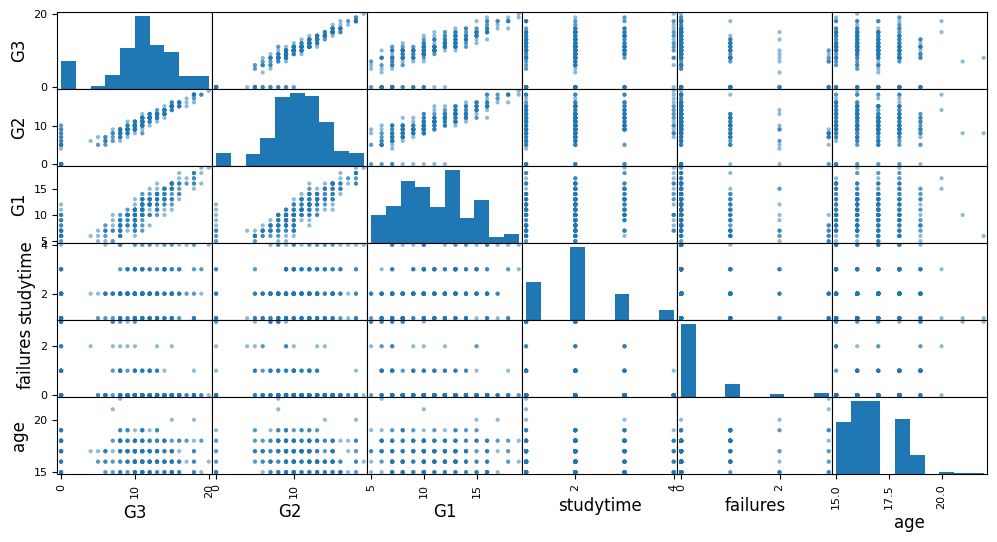

In [71]:
# plots every numerical attribute against every other numerical attribute
from pandas.plotting import scatter_matrix

# need to reduce attributes so that it fits on screen
attributes = ["G3", "G2", "G1",
              "studytime","failures","age"]

# plots scatterplots and histograms when variable is compared against itself
scatter_matrix(train_data[attributes], figsize=(12, 6))
plt.show()

The scatter matrix is a little difficult to interpret because some of our numerical data only has a small number of options (0-3 or 0-4). Let's try visualizing by grouping and calculating the mean target for these features.

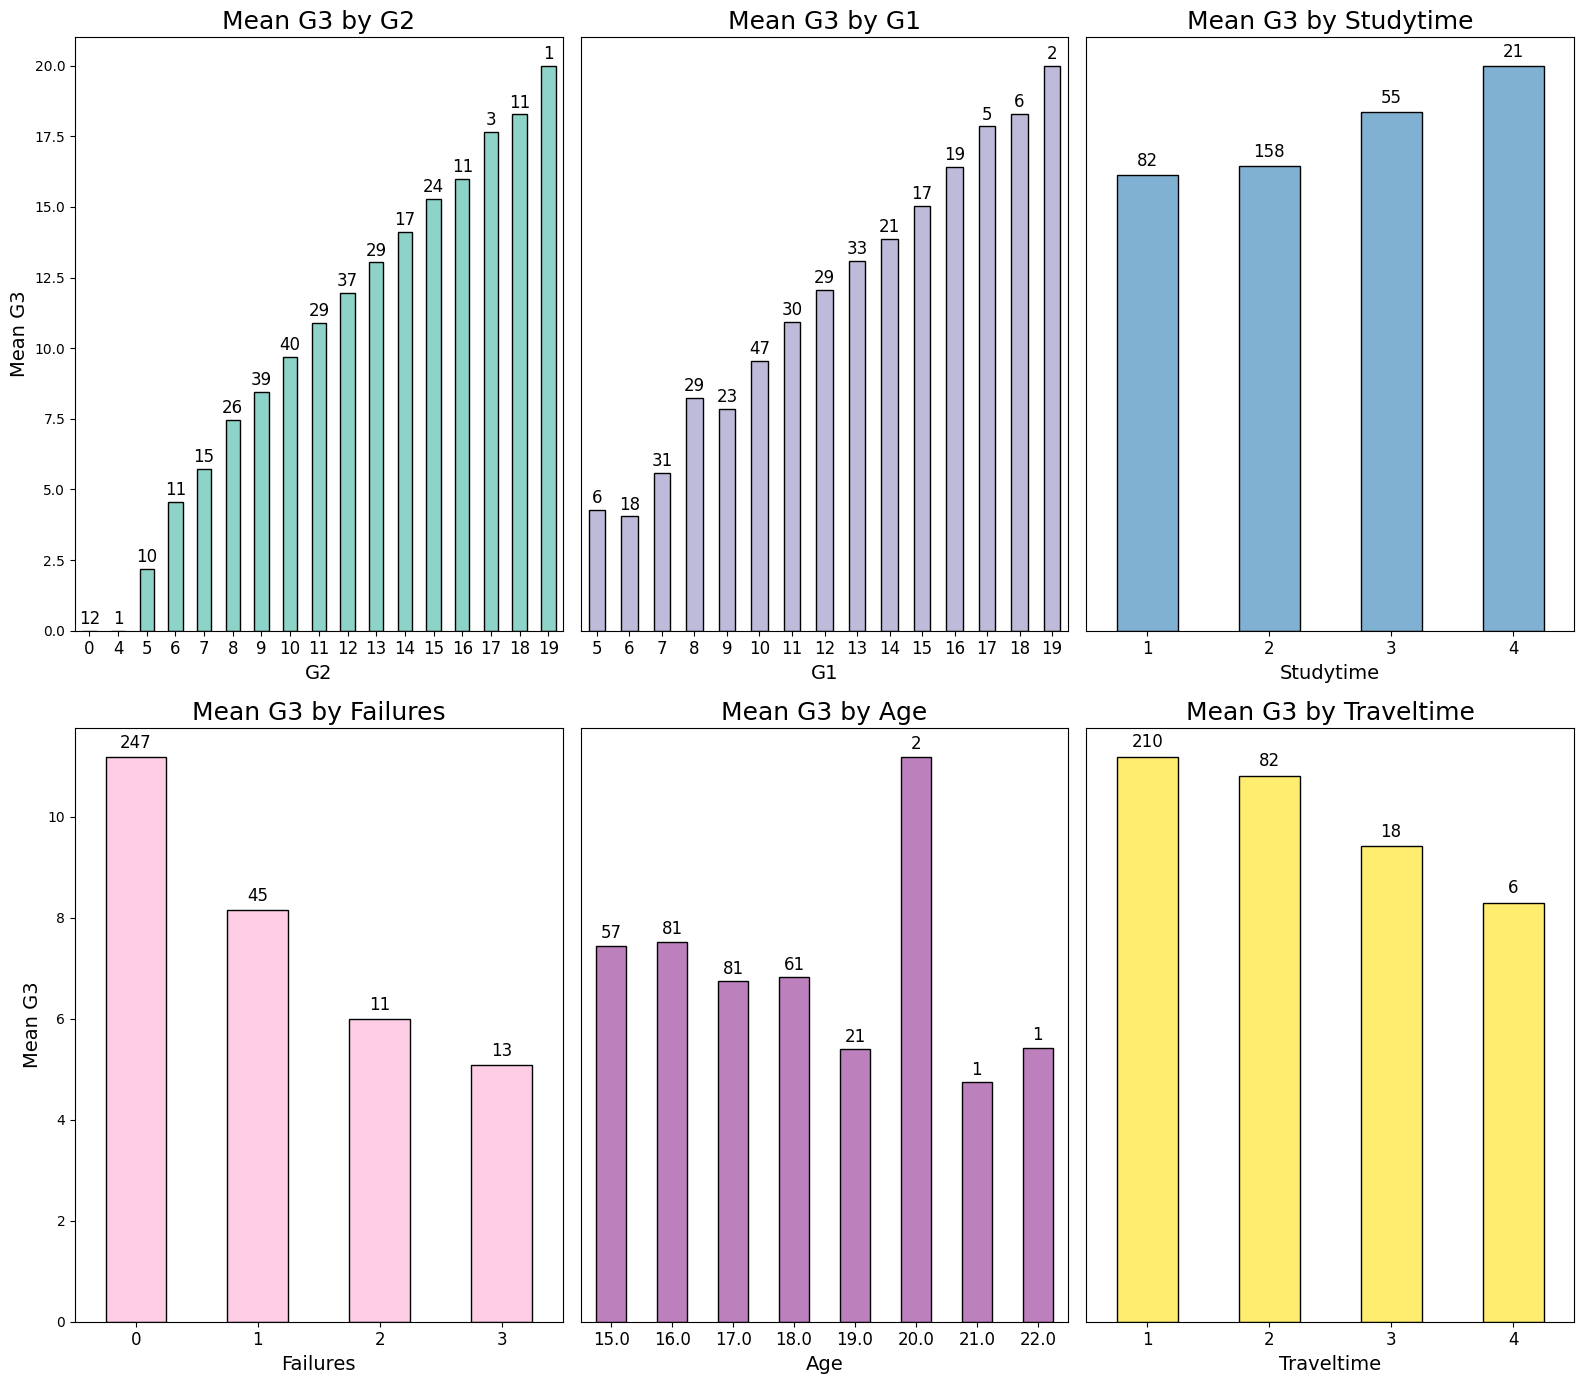

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Define the numerical columns to group by (excluding G3 itself, since we're using it as the target)
attributes = ["G2", "G1", "studytime", "failures", "age", "traveltime"]

# Set up the figure size and layout
plt.figure(figsize=(16, 14))

# Define a color palette using the 'Set3' colormap
colors = plt.cm.Set3(np.linspace(0, 1, len(attributes)))

# Loop through each numerical column, group by it, calculate the mean of G3, and plot
for i, col in enumerate(attributes, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid with 2 rows and 3 columns
    
    # Handle missing or infinite values
    column_data = train_data[col].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Convert to integer if necessary
    column_data = column_data.astype(int)
    
    # Calculate the mean of G3 grouped by the column
    means = train_data.groupby(column_data)['G3'].mean()
    
    # Plot the results
    bar_plot = means.plot(kind='bar', color=colors[i-1], edgecolor='black')  # Use different colors for each bar
    
    # Add value counts on top of the bars for each graph
    counts = train_data[col].value_counts().sort_index()  # Get the counts
    for j, count in enumerate(counts):
        bar_plot.text(j, means.iloc[j] + 0.1, str(count), ha='center', va='bottom', fontsize=12)  # Increase the font size
    
    plt.title(f"Mean G3 by {col.capitalize()}", fontsize=18)  # Increase title font size
    if i in [1, 4]:  # Keep y-axis label only for the first plot in each row
        plt.ylabel('Mean G3', fontsize=14)  # Increase y-axis label font size
    else:
        plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis label
    
    plt.xlabel(col.capitalize(), fontsize=14)  # Increase x-axis label font size
    plt.xticks(rotation=0, fontsize=12)  # Increase x-tick labels font size

plt.tight_layout()
plt.show()


This shows the negative correlation between failures and term 3 grades, as one would expect. Interestingly, this shows a spike in the mean term 3 grades for students aged 20. Remember our counts from earlier? There are only 2 students that are represented by that spiked mean bar. The reduced number of older students means those averages are extremely sensitive to each instance. 

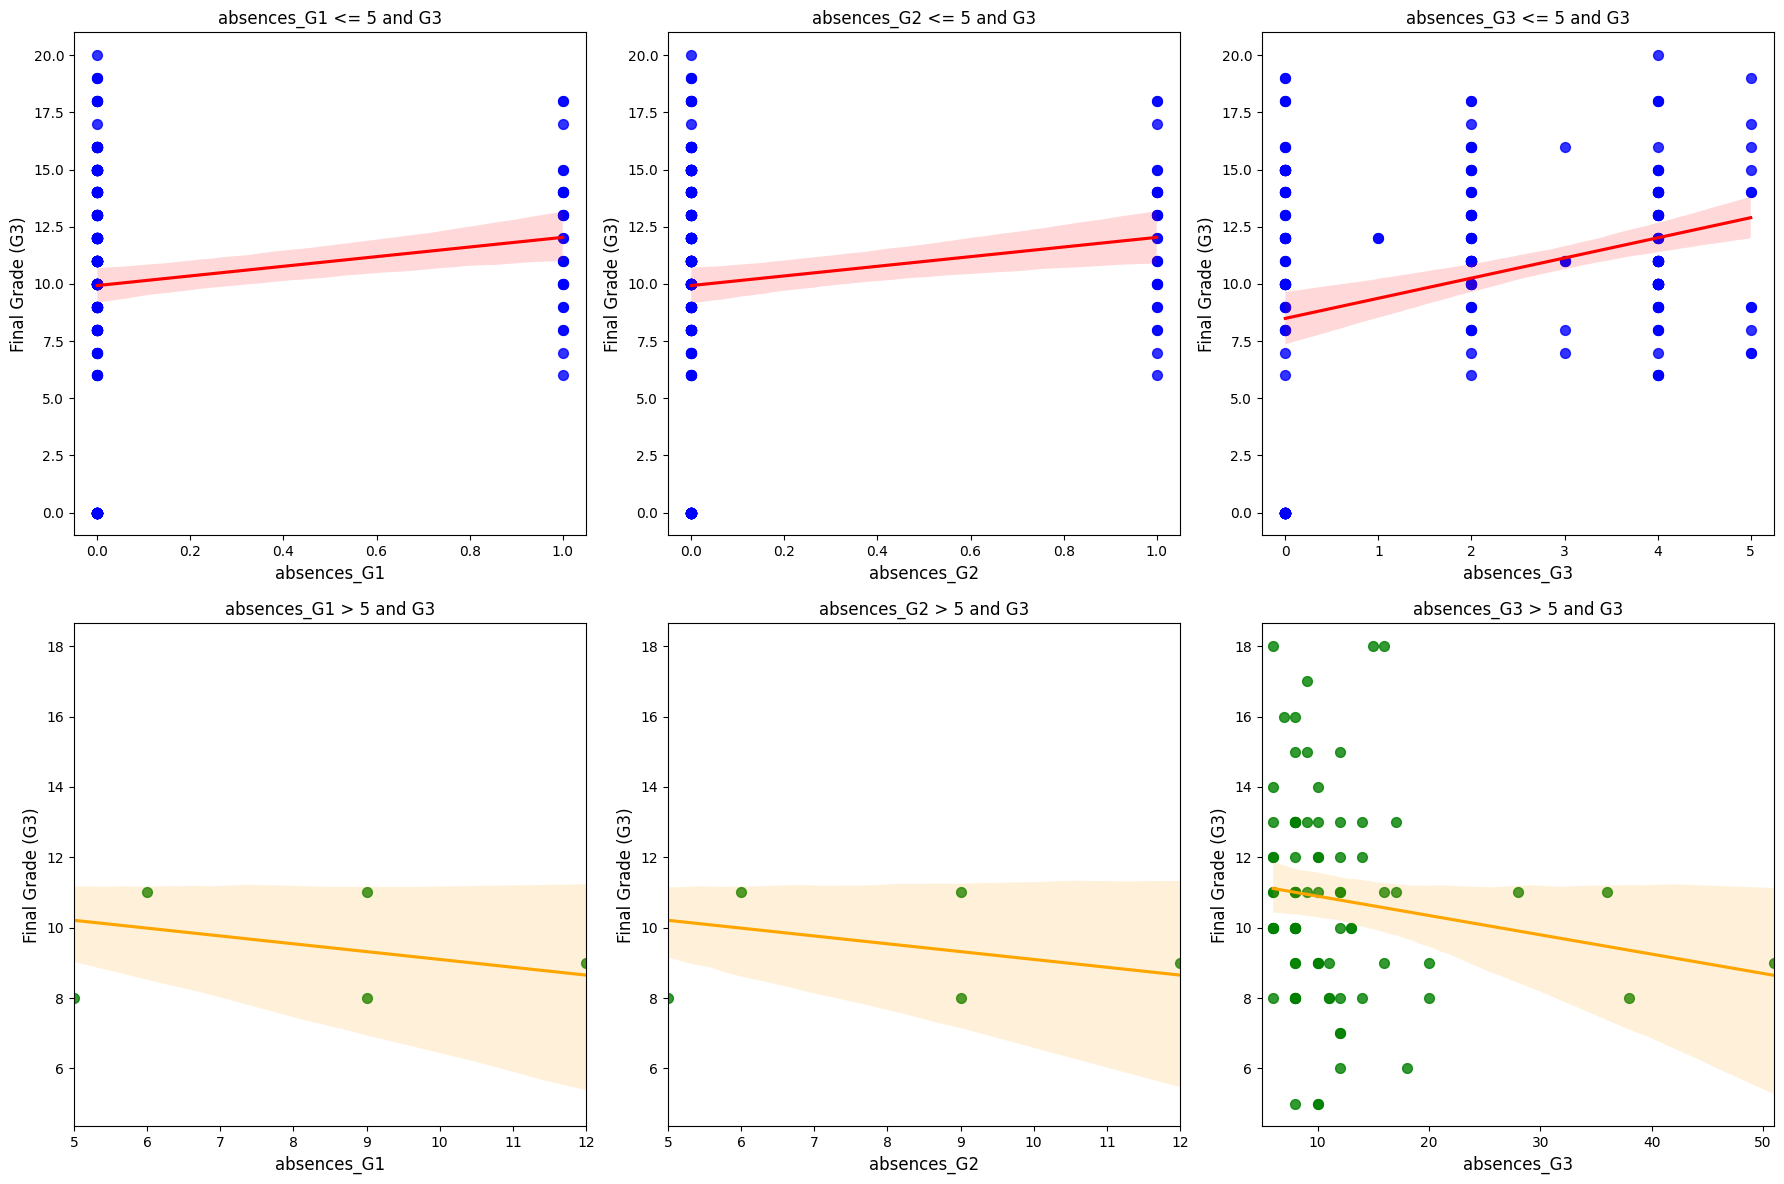

In [73]:
import seaborn as sns

threshold = 5  # Change the threshold to 10

# Divide the data based on the new threshold for each term
group_below_threshold = train_data[(train_data["absences_G1"] <= threshold) & 
                                   (train_data["absences_G2"] <= threshold) & 
                                   (train_data["absences_G3"] <= threshold)]

group_above_threshold = train_data[(train_data["absences_G1"] > threshold) | 
                                   (train_data["absences_G2"] > threshold) | 
                                   (train_data["absences_G3"] > threshold)]

# Visualize the data with the updated threshold
plt.figure(figsize=(18, 12))

absence_columns = ["absences_G1", "absences_G2", "absences_G3"]

for i, col in enumerate(absence_columns, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid with 2 rows and 3 columns
    sns.regplot(x=col, y='G3', data=group_below_threshold, scatter_kws={'color': 'blue', 's': 50}, line_kws={'color': 'red'})
    plt.title(f'{col} <= {threshold} and G3')
    plt.xlabel(f'{col}')
    plt.ylabel('Final Grade (G3)')

for i, col in enumerate(absence_columns, 4):
    plt.subplot(2, 3, i)  # Continue subplot grid for the above threshold group
    sns.regplot(x=col, y='G3', data=group_above_threshold, scatter_kws={'color': 'green', 's': 50}, line_kws={'color': 'orange'})
    plt.xlim(threshold, group_above_threshold[col].max())  # Update x-axis limits to reflect the new threshold
    plt.title(f'{col} > {threshold} and G3')
    plt.xlabel(f'{col}')
    plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()


This shows us that more than 5 absences generally has a negative effect on the 3rd term grades. However, the variables relationship does not appear strictly linear. We should consider this when developing our ML models. 

In [74]:
threshold = 5

# Divide the data based on the threshold for each term
group_below_threshold = train_data[(train_data["absences_G1"] <= threshold) & 
                                   (train_data["absences_G2"] <= threshold) & 
                                   (train_data["absences_G3"] <= threshold)]

group_above_threshold = train_data[(train_data["absences_G1"] > threshold) | 
                                   (train_data["absences_G2"] > threshold) | 
                                   (train_data["absences_G3"] > threshold)]

# Calculate correlations for below threshold group
correlation_below = group_below_threshold[absence_columns + ['G3']].corr()['G3'].drop('G3')

# Calculate correlations for above threshold group
correlation_above = group_above_threshold[absence_columns + ['G3']].corr()['G3'].drop('G3')

print(f"Correlation between absences and G3 (<= {threshold} absences):")
print(correlation_below)

print(f"Correlation between absences and G3 (> {threshold} absences):")
print(correlation_above)

Correlation between absences and G3 (<= 5 absences):
absences_G1    0.138393
absences_G2    0.138393
absences_G3    0.310425
Name: G3, dtype: float64
Correlation between absences and G3 (> 5 absences):
absences_G1   -0.140797
absences_G2   -0.140797
absences_G3   -0.136038
Name: G3, dtype: float64


In [75]:
# List to store results
threshold_results = []

# Define the absence columns
absence_columns = ["absences_G1", "absences_G2", "absences_G3"]

# Iterate over a range of threshold values to find the strongest negative correlation
for threshold in range(1, 16):  # You can adjust the range based on your data
    # Divide the data based on the threshold for each term
    group_below_threshold = train_data[(train_data["absences_G1"] <= threshold) & 
                                       (train_data["absences_G2"] <= threshold) & 
                                       (train_data["absences_G3"] <= threshold)]

    group_above_threshold = train_data[(train_data["absences_G1"] > threshold) | 
                                       (train_data["absences_G2"] > threshold) | 
                                       (train_data["absences_G3"] > threshold)]

    # Calculate correlations for below threshold group
    correlation_below = group_below_threshold[absence_columns + ['G3']].corr()['G3'].drop('G3')

    # Calculate correlations for above threshold group
    correlation_above = group_above_threshold[absence_columns + ['G3']].corr()['G3'].drop('G3')

    # Store the results
    threshold_results.append({
        'threshold': threshold,
        'correlation_below': correlation_below.mean(),  # Average correlation for below threshold group
        'correlation_above': correlation_above.mean()   # Average correlation for above threshold group
    })

# Convert results to a DataFrame for easy viewing
threshold_df = pd.DataFrame(threshold_results)

# Find the threshold with the strongest negative correlation above the threshold
strongest_negative_corr = threshold_df.loc[threshold_df['correlation_above'].idxmin()]

print(f"Threshold with the strongest negative correlation above the threshold: {strongest_negative_corr['threshold']}")
print(threshold_df)


Threshold with the strongest negative correlation above the threshold: 14.0
    threshold  correlation_below  correlation_above
0           1           0.090683          -0.150105
1           2           0.332386          -0.129713
2           3           0.315707          -0.138621
3           4           0.179738          -0.157207
4           5           0.195737          -0.139211
5           6           0.200009          -0.118999
6           7           0.208029          -0.101810
7           8           0.162395          -0.115107
8           9           0.181805          -0.044547
9          10           0.148429          -0.080263
10         11           0.131216          -0.137810
11         12           0.103797          -0.252396
12         13           0.099690          -0.292422
13         14           0.099249          -0.321789
14         15           0.114376          -0.232286


This tells us there is a strong negative corraletion between absences over 14 and G3. 

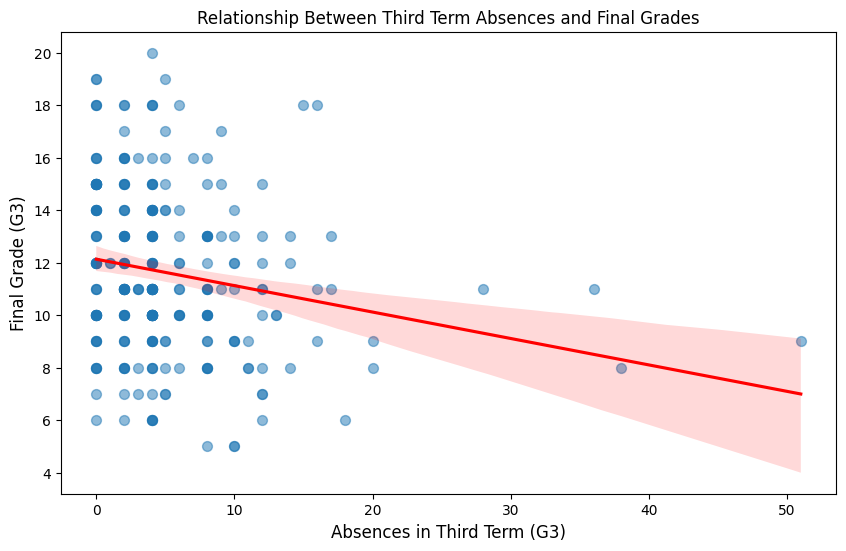

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the 38 instances where there are 0 absences and a grade of 0
# These students could have had disciplinary action, special circumstances, or could be due to error
filtered_data = train_data[~((train_data['absences_G3'] == 0) & (train_data['G3'] == 0))]

# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='absences_G3', y='G3', data=filtered_data, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel('Absences in Third Term (G3)')
plt.ylabel('Final Grade (G3)')
plt.title('Relationship Between Third Term Absences and Final Grades')

# Display the plot
plt.show()


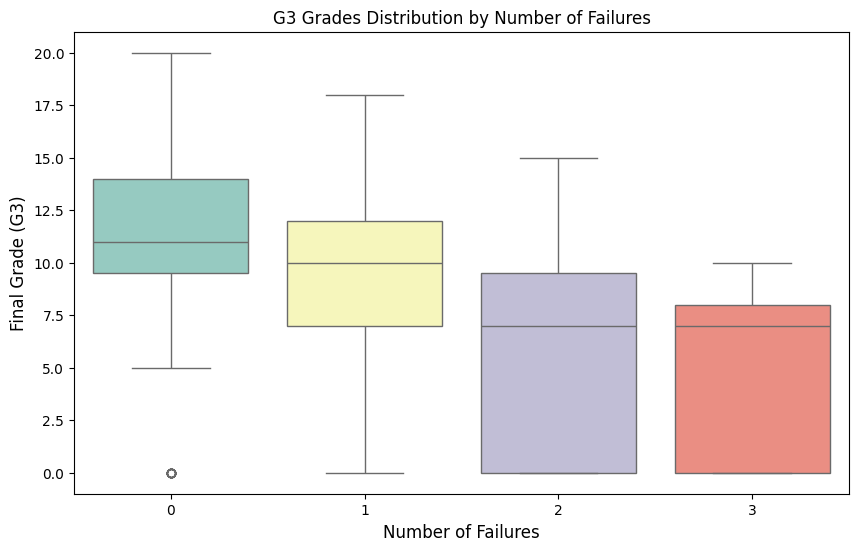

In [77]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a box plot with the recommended change to avoid the warning
sns.boxplot(x='failures', y='G3', hue='failures', data=train_data, palette='Set3', dodge=False)

# Add labels and title
plt.title('G3 Grades Distribution by Number of Failures')
plt.xlabel('Number of Failures')
plt.ylabel('Final Grade (G3)')

# Optionally, hide the legend if it's not needed
plt.legend([],[], frameon=False)

plt.show()


This bloxplot demonstrates the strong correlation between number of failures and decreasing average grades. 

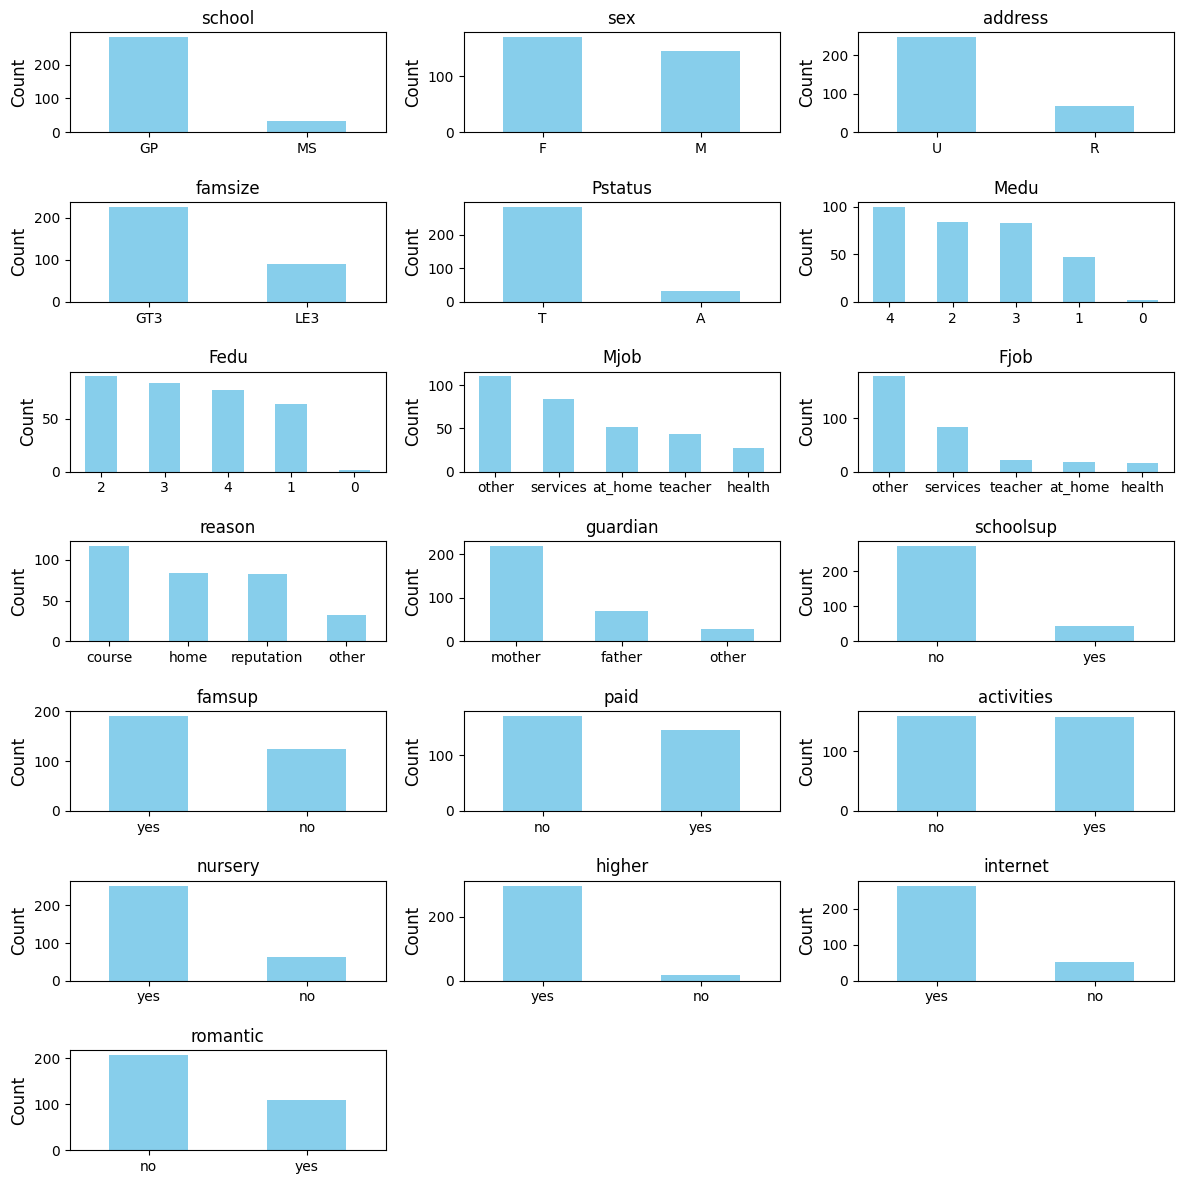

In [78]:
# let's look at the categorical data next
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

# set the figure size
plt.figure(figsize=(12, 12))

# loop through each categorical column and create a bar plot
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols) // 3 + 1, 3, i)
    train_data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(col)          # Set the title as the column name
    plt.ylabel('Count')      # Keep the y-axis label
    plt.xticks(rotation=0)   # Straighten the x-ticks
    plt.xlabel('')           # Remove the x-label

# Adjust the spacing between plots to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(hspace=0.7)  # Increase the height space between plots more carefully

plt.show()


Visualizing the categorical variables helps to show the varying responses and their value counts. For example, our previous deduction that about half the students have extra-curricular activities is confirmed here. Also, the `reason` category shows a distributed response among students. We should keep these response values in mind when we check for variable correlations.

In [79]:
from sklearn.preprocessing import OneHotEncoder

# list numerical and categorical variables 
num_cols = ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
            'goout', 'Dalc', 'Walc', 'health', 'absences_G1', 'absences_G2', 
            'absences_G3', 'G1', 'G2', 'G3']

cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
            'activities', 'nursery', 'higher', 'internet', 'romantic']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit-transform the categorical columns and convert to DataFrame
encoded_cat_df = pd.DataFrame(encoder.fit_transform(train_data[cat_cols]), 
                              columns=encoder.get_feature_names_out(cat_cols))

# Concatenate the encoded categorical columns with the target variable 'G3'
encoded_train_data = pd.concat([encoded_cat_df, train_data['G3']], axis=1)

# Calculate the correlation matrix
correlation_matrix = encoded_train_data.corr()

# Display the correlations with G3
correlation_with_G3 = correlation_matrix['G3'].sort_values(ascending=False)
print(correlation_with_G3)

G3                   1.000000
famsup_yes           0.074032
Medu_4               0.071204
Medu_2               0.066557
Mjob_teacher         0.065240
Pstatus_T            0.061024
activities_yes       0.059655
Fjob_teacher         0.056010
Fedu_4               0.047527
Fjob_health          0.042013
higher_yes           0.039514
address_U            0.035655
internet_yes         0.031972
Mjob_health          0.028218
Fedu_3               0.027181
Fedu_1               0.024879
nursery_yes          0.024250
guardian_other       0.018460
paid_yes             0.016415
guardian_mother      0.013841
Fjob_other           0.011686
reason_other        -0.002864
schoolsup_yes       -0.011612
reason_reputation   -0.034864
Mjob_services       -0.036838
Fjob_services       -0.052626
Mjob_other          -0.053089
romantic_yes        -0.053814
sex_M               -0.056631
Medu_1              -0.067285
school_MS           -0.069150
Medu_3              -0.080770
famsize_LE3         -0.089681
Fedu_2    

The correlation between our target and the categorical variables shows that `reason_home` has a moderate negative correlation to 3rd quarter grades. The `reason_home` variable is the result of OneHotEncoding that converted our categorical variables into a binary matrix to enable correlation computation. What this tells us is that the original data's `reason` variable, which represents the reason for which students or their families chose their school, may have an influence on the students overall grades.

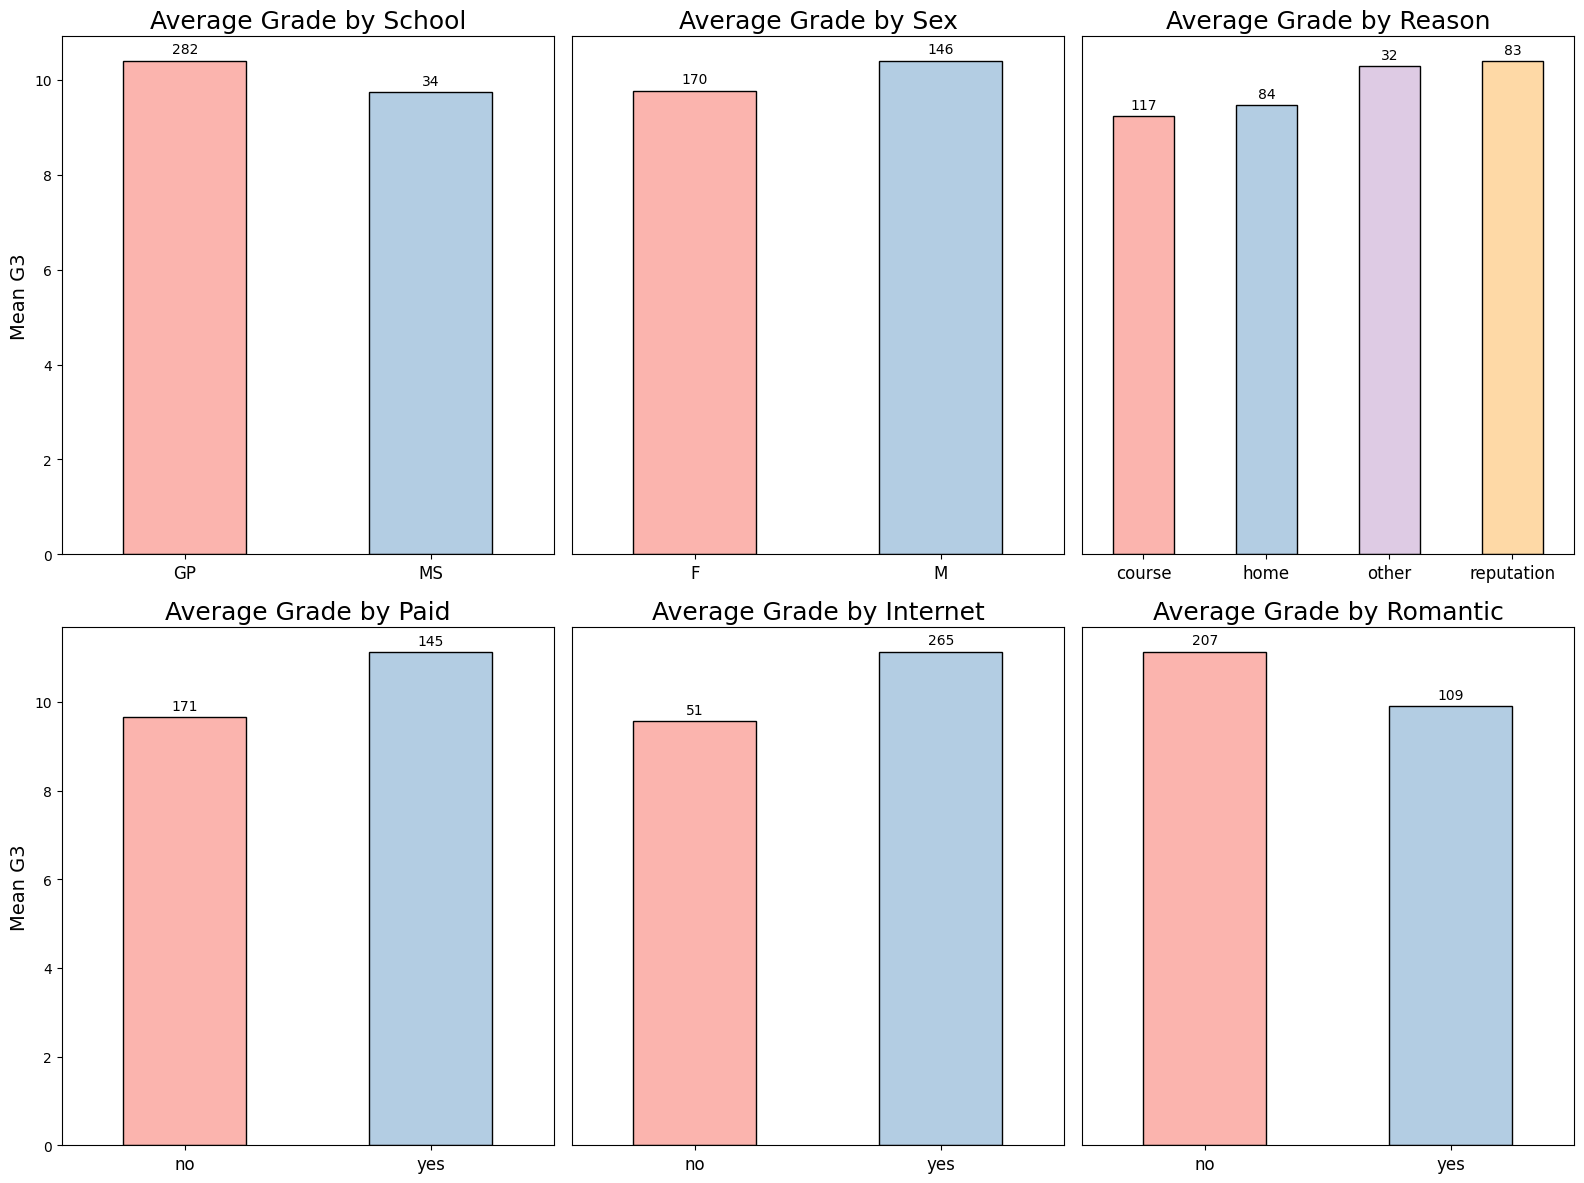

In [80]:
# Define the categorical columns to group by
groupby_cols = ['school', 'sex', 'reason', 'paid', 'internet', 'romantic']

# Set up the figure size and layout
plt.figure(figsize=(16, 12))

# Define a color palette using the 'Pastel1' colormap
colors = plt.cm.Pastel1(np.linspace(0, 2, 12))  # Adjust the number of colors as needed

# Loop through each categorical column, group by it, calculate the mean of G3, and plot
for i, col in enumerate(groupby_cols, 1):
    plt.subplot(2, 3, i)  # Create a subplot grid with 2 rows and 3 columns
    means = train_data.groupby(col)['G3'].mean()
    
    # Plot the results and capture the bar container
    bar_plot = means.plot(kind='bar', color=colors[:len(means)], edgecolor='black')  # Use different colors for each bar
    
    # Add value counts on top of the bars
    counts = train_data[col].value_counts().sort_index()  # Get the counts
    for j, count in enumerate(counts):
        bar_plot.text(j, means.iloc[j] + 0.1, str(count), ha='center', va='bottom', fontsize=10)
    
    # Update the title
    plt.title(f"Average Grade by {col.capitalize()}", fontsize=18)
    
    # Handle y-axis label
    if i in [1, 4]:  # Keep y-axis label only for the first plot in each row
        plt.ylabel('Mean G3', fontsize=14)
    else:
        plt.gca().axes.get_yaxis().set_visible(False)  # Hide y-axis label
    
    # Remove only the x-axis label, not the ticks
    plt.xlabel('')
    plt.xticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()


The students at the `GP` school perform better, on average, than those at the `MS` school. However, the latter is under represented proportionally. Males perform slightly better on average. Those who chose the school for its reputation and "other" reasons earn slightly higher grades that those who listed their reason as "course" or "home". The students who had access to extra paid support for school performed better, as well as those with internet access at home. Lastly, students without a romantic relationship tended to earn higher grades. 

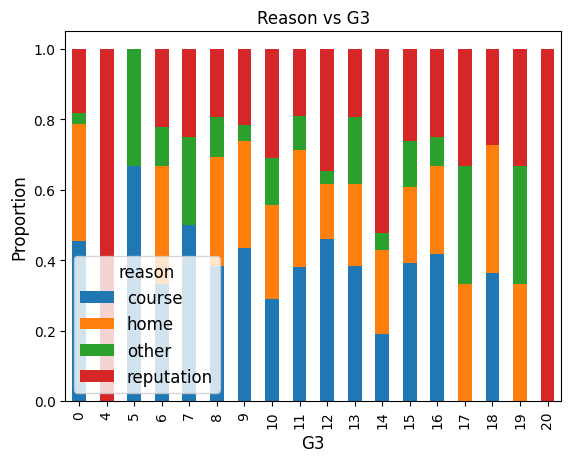

In [81]:
pd.crosstab(train_data['G3'], train_data['reason'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Reason vs G3")
plt.ylabel("Proportion")
plt.show()


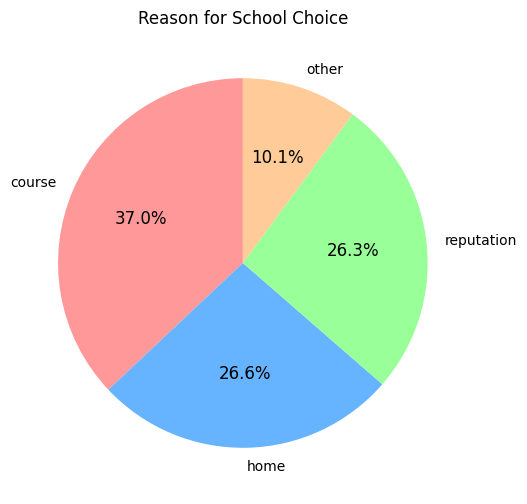

In [82]:
# let's view the distribution of `reason` among our training set students
school_choice_reason = X_train["reason"].value_counts()

# plot the pie chart with the new color palette
plt.figure(figsize=(6, 6))
plt.pie(school_choice_reason, labels=school_choice_reason.index, autopct="%1.1f%%", startangle=90, colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Reason for School Choice")
plt.show()


### Data Preparation

#### Feature Selection

Following the exploration phase, the next step is to select the most relevant features for the model. Reducing the number of features can help decrease model complexity and improve overall performance by concentrating on the most influential variables.

The lists below define the columns used in the model, which will be incorporated into the column transformer:

- **numeric_columns**: This list includes continuous numerical data, with inclusion of `absences_G1`, `absences_G2`, `absences_G3`, `G1`, and `G2` for use in the custom transformer, alongside other selected numerical columns. It is important to note that not all columns labeled as integers or floats necessarily represent continuous data.
- **categorical_columns**: This list contains selected categorical features, ensuring representation of at least one categorical variable.
- **ordinal_columns**: This list includes the chosen ordinal features, with a minimum of one ordinal column.


In [83]:
# list features wanted for the model
numeric_columns = ["absences_G1", "absences_G2", "absences_G3", "G1", "G2", "failures", "age"]
categorical_columns = ["reason", "romantic"]
ordinal_columns = ["studytime", "traveltime"]

### Custom Transformer

The objective is to create a new feature by summing the three absence columns into a single column. Additionally, this transformer will conditionally retain or drop the grades from the first and second terms based on specified parameters.

G3, the final year grade, has a strong correlation with G2 and G1, the grades from the first two terms. While predicting G3 without the inclusion of G2 and G1 is more challenging, it is also more valuable as it allows for earlier predictions in the academic year. To evaluate this, separate models will be created: one that includes the G1 and G2 columns, and another that excludes them.

#### Transformer Implementation

A custom transformer will be developed with the following specifications:

- Inherits from `BaseEstimator` and `TransformerMixin`.
- Implements both the `fit` and `transform` methods.
- Accepts a DataFrame as input, facilitating easier testing and validation.

Within the `transform` method:

- A new column, `absences_sum`, is created by summing the `absences_G1`, `absences_G2`, and `absences_G3` columns. This new column is added to the end of the DataFrame, and the original three absence columns are then removed.
- The `G1` and `G2` columns are dropped if the `drop_grades` parameter is set to `True`. If `drop_grades` is `False`, these columns are retained.

The custom transformer class will be named `FinalProjectTransformer`.


In [84]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create custom transformer
class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=True):
        self.drop_grades = drop_grades
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()  # Work on a copy of the DataFrame
        
        # Create the 'absences_sum' column
        X['absences_sum'] = X['absences_G1'] + X['absences_G2'] + X['absences_G3']
        
        # Drop the original absence columns
        X.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1, inplace=True)
        
        # Drop 'G1' and 'G2' if drop_grades is True
        if self.drop_grades:
            X.drop(['G1', 'G2'], axis=1, inplace=True)
        
        # Debugging: Print the columns after transformation
        print("Numeric columns after transformation:", X.columns)
            
        return X


### Data Pipelines

Establishing data pipelines streamlines the data cleaning process, enabling consistent application of transformations to both existing and new datasets. The goal is to transform the dataset into two versions: one that includes the G1/G2 columns and another that excludes them.

#### Pipeline Setup

- **Numeric Pipeline** (two pipelines are required to handle the inclusion/exclusion of G1/G2):
  - Impute missing values using `SimpleImputer()`. Utilize the `.set_output(transform="pandas")` method to ensure the imputer outputs a DataFrame compatible with the custom transformer.
  - Apply the `FinalProjectTransformer` for the appropriate task.
  - Standardize the data using `StandardScaler()`.
  - Use the following variable names:
    - `numeric_pipeline_with_grades`
    - `numeric_pipeline_without_grades`

- **Categorical Pipeline**:
  - Impute missing values.
  - One-Hot Encode (OHE) categorical data.
  - Use the variable name:
    - `categorical_pipeline`

- **Ordinal Pipeline**:
  - Impute missing values.
  - Ordinal encode the data.
  - Use the variable name:
    - `ordinal_pipeline`

- **Column Transformer** (two transformers to accommodate the different numeric pipelines):
  - Incorporate the previously defined feature selection lists.
  - Combine the numeric, categorical, and ordinal pipelines.
  - Use the following variable names:
    - `column_transformer_with_grades`
    - `column_transformer_without_grades`
    
Once the full pipeline is constructed, fit and transform `X_train`, saving the results as `X_train_transformed_with_grades` and `X_train_transformed_without_grades`. Verify that the transformed data without grades contains two fewer columns.


In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline

numeric_pipeline_with_grades = make_pipeline(
    SimpleImputer(strategy="median").set_output(transform="pandas"),
    FinalProjectTransformer(drop_grades=False),
    StandardScaler())

numeric_pipeline_without_grades = make_pipeline(
    SimpleImputer(strategy="median").set_output(transform="pandas"),
    FinalProjectTransformer(drop_grades=True),
    StandardScaler())

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop='first'))

ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder())


In [86]:
from sklearn.compose import ColumnTransformer

# create column transformer with our pipelines
column_transformer_with_grades = ColumnTransformer([
        ("num_grades", numeric_pipeline_with_grades, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ("ord", ordinal_pipeline, ordinal_columns)
    ])

column_transformer_without_grades = ColumnTransformer([
        ("num_drop_grades", numeric_pipeline_without_grades, numeric_columns),
        ("cat", categorical_pipeline, categorical_columns),
        ("ord", ordinal_pipeline, ordinal_columns)
    ])

In [87]:
# fit and transform training data
X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)

X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)

Numeric columns after transformation: Index(['G1', 'G2', 'failures', 'age', 'absences_sum'], dtype='object')
Numeric columns after transformation: Index(['failures', 'age', 'absences_sum'], dtype='object')


In [88]:
# check shapes to verify there are 2 less columns in data without grades
X_train_transformed_with_grades.shape

(316, 11)

In [89]:
# check chape without grades
X_train_transformed_without_grades.shape

(316, 9)

## Shortlisting Promising Models

This section focuses on fitting and comparing three regression models using the transformed data, both with and without the G1/G2 columns, leveraging cross-validation. The objective is to evaluate the performance of each model and identify the most promising candidates for predicting student grades.

### Model Initialization and Comparison

1) **Model Initialization**:
   - Three regression models will be instantiated:
     - Linear Regression
     - Support Vector Machine (SVM) Regression
     - Lasso Regression

2) **Model Comparison via Cross-Validation**:
   - Perform 3-fold cross-validation on each model using both sets of transformed data (with and without G1/G2 columns).
   - The performance metric will be Root Mean Squared Error (RMSE).
   - Cross-validation will be conducted six times in total, comparing each model with both versions of the data.
   - The mean RMSE for each model will be calculated and compared 


In [90]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR

# initialize the model classes
lin_reg = LinearRegression()
svm_reg = SVR()
lasso_reg = Lasso()

In [91]:
from sklearn.model_selection import cross_val_score

# run cross validation for each model with both transformed data versions
cv_scores_lin_reg_with_grades = -cross_val_score(lin_reg, X_train_transformed_with_grades, y_train, 
                                                 cv=3, scoring="neg_root_mean_squared_error")
cv_scores_lin_reg_without_grades = -cross_val_score(lin_reg, X_train_transformed_without_grades, y_train, 
                                                    cv=3, scoring="neg_root_mean_squared_error")
cv_scores_svm_with_grades = -cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, 
                                                 cv=3, scoring="neg_root_mean_squared_error")
cv_scores_svm_without_grades = -cross_val_score(svm_reg, X_train_transformed_without_grades, y_train, 
                                                    cv=3, scoring="neg_root_mean_squared_error")
cv_scores_lasso_with_grades = -cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, 
                                                   cv=3, scoring="neg_root_mean_squared_error")
cv_scores_lasso_without_grades = -cross_val_score(lasso_reg, X_train_transformed_without_grades, y_train, 
                                                      cv=3, scoring="neg_root_mean_squared_error")

# save the means of the cross validation arrays
rmse_lin_reg_with_grades = cv_scores_lin_reg_with_grades.mean()
rmse_lin_reg_without_grades = cv_scores_lin_reg_without_grades.mean()
rmse_svm_with_grades = cv_scores_svm_with_grades.mean()
rmse_svm_without_grades = cv_scores_svm_without_grades.mean()
rmse_lasso_with_grades = cv_scores_lasso_with_grades.mean()
rmse_lasso_without_grades = cv_scores_lasso_without_grades.mean()

# view the mean RMSE for each model and transformed data combination
print("RMSE (Linear Regression with Grades):", rmse_lin_reg_with_grades)
print("RMSE (Linear Regression without Grades):", rmse_lin_reg_without_grades)
print("RMSE (SVM with Grades):", rmse_svm_with_grades)
print("RMSE (SVM without Grades):", rmse_svm_without_grades)
print("RMSE (Lasso Regression with Grades):", rmse_lasso_with_grades)
print("RMSE (Lasso Regression without Grades):", rmse_lasso_without_grades)


RMSE (Linear Regression with Grades): 1.8903698669947355
RMSE (Linear Regression without Grades): 4.289091353392974
RMSE (SVM with Grades): 2.5320281795585813
RMSE (SVM without Grades): 4.2765217617647195
RMSE (Lasso Regression with Grades): 2.1690514380657917
RMSE (Lasso Regression without Grades): 4.386455909382055


Our chosen performance measure is the Root Mean Squared Error (RMSE), which tells us how much error the system makes in its prediction with higher weights given to larger errors. A smalled RMSE indicated a lower error rate and a better performing model. 

The linear regression model that includes the data from the 1st and 2nd term grades performed the best out of our 6 models. If the grades of the first 2 terms are not always expected with new data, the best performing model is the SVM model. 

## Fine-Tuning the Model

In this phase of the project, the focus is on optimizing the Support Vector Machine (SVM) regression model by fine-tuning its hyperparameters through grid search. The objective is to enhance model performance by systematically exploring a range of hyperparameters to find the optimal configuration.

### Grid Search Setup and Execution

1) **Defining the Parameter Grid**:
   A parameter grid is established to specify the hyperparameters and their respective ranges for the grid search. This allows for a comprehensive exploration of possible configurations. The choice of parameters is guided by the characteristics of the SVM regression model as documented in Scikit-learn's resources.

2) **Initializing and Running Grid Search**:
   `GridSearchCV` is employed to conduct the grid search over the defined parameter grid. This approach is applied to both versions of the transformed training data—one that includes the G1/G2 columns and one that excludes them. This ensures that the model is optimized under both conditions, providing insights into the impact of these features on the model's performance.

3) **Evaluating and Selecting the Best Parameters**:
   Upon completion of the grid search, the best hyperparameters are identified for each dataset variation. These parameters are crucial as they directly influence the model's predictive accuracy and generalization capabilities. The best-performing parameters for each case are stored for further analysis.

4) **Assessing Model Performance**:
   The grid search also provides the mean cross-validated score for the best model. This score is an important metric as it reflects the model's expected performance on unseen data. By comparing the scores from both datasets (with and without G1/G2), it’s possible to evaluate the significance of these features and their effect on the model’s accuracy.

> **Consideration**: Given the potential computational demands of grid search, especially when dealing with large parameter grids, it’s important to balance thoroughness with efficiency. Limiting the number of hyperparameters can reduce runtime without significantly compromising the quality of the results.


In [92]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameter values
param_grid = {'C': [.1, 1, 10],
              'kernel': ('poly', 'rbf'),
              'epsilon': [.001, .01, .10, 1]}

# initialize GridSearchCV for the SVM model 
grid_search = GridSearchCV(svm_reg, param_grid, verbose=1, cv=10, scoring="neg_root_mean_squared_error")

# fit the grid search on the dataset with grades
grid_search_with_grades = grid_search.fit(X_train_transformed_with_grades, y_train)

# reinitialize the GridSearchCV to avoid overwriting
grid_search2 = GridSearchCV(svm_reg, param_grid, verbose=1, cv=10, scoring="neg_root_mean_squared_error")

# fit the grid search on the dataset without grades
grid_search_without_grades = grid_search2.fit(X_train_transformed_without_grades, y_train)

# Save the best models
svm_tuned_with_grades = grid_search_with_grades.best_estimator_
svm_tuned_without_grades = grid_search_without_grades.best_estimator_

# save best parameters
best_params_with_grades = grid_search_with_grades.best_params_
best_params_without_grades = grid_search_without_grades.best_params_

# save the mean cross-validation score
best_score_with_grades = grid_search_with_grades.best_score_
best_score_without_grades = grid_search_without_grades.best_score_

print("Best SVM Regression parameters with grades:", best_params_with_grades)
print("Best SVM Regression parameters without grades:", best_params_without_grades)
print("Best cross-validated score with grades:", best_score_with_grades)
print("Best cross-validated score without grades:", best_score_without_grades)


Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Best SVM Regression parameters with grades: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}
Best SVM Regression parameters without grades: {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}
Best cross-validated score with grades: -1.712727061455609
Best cross-validated score without grades: -4.17556317379872


In [93]:
# Convert negative scores to positive RMSE
rmse_with_grades = -best_score_with_grades
rmse_without_grades = -best_score_without_grades

print("RMSE (tuned SVM with Grades):", rmse_with_grades)
print("RMSE (tuned SVM without Grades):", rmse_without_grades)


RMSE (tuned SVM with Grades): 1.712727061455609
RMSE (tuned SVM without Grades): 4.17556317379872


Fine-Tuning the SVR Model

In our initial SVR model, we did not perform any hyperparameter tuning, which meant that the model relied on the default values provided by the scikit-learn implementation. Specifically, the model used a regularization parameter C set to 1.0 and an epsilon value of 0.1 for the epsilon-tube, which defines the margin of tolerance where no penalty is given to errors.

Default Parameters and Their Impact

The default C=1.0 reflects a moderate level of regularization, where the model attempts to balance the trade-off between fitting the training data closely and maintaining a margin that allows for better generalization to unseen data. The epsilon=0.1 value means that the model was somewhat lenient, ignoring errors smaller than 0.1 units in the target variable. While these default settings are generally a good starting point, they may not be optimal for all datasets, particularly those where fine-grained prediction accuracy is critical.

Grid Search and Hyperparameter Optimization

To improve the performance of the SVR model, we conducted a grid search to systematically explore a range of hyperparameters. The grid search tested different combinations of the regularization parameter C and the epsilon value, allowing us to identify the combination that minimized the cross-validated RMSE, thereby providing the best predictive performance.

Results of the Fine-Tuning Process

After completing the grid search, we identified the best hyperparameters for our Support Vector Regression (SVR) model: C=10 and epsilon=1 with grades, and C=1 and epsilon=0.001 without grades. This result indicates that the regularization strength (C) needed to be increased when grades were included, and reducing the epsilon value to 0.001 led to a more sensitive and accurate model without grades.

Interpretation of the Tuned Parameters

The reduction in epsilon to 0.001 for the model without grades suggests that our SVR model significantly benefits from increased sensitivity to small deviations in the target variable. By narrowing the epsilon-tube, the model now penalizes even minor errors that were previously ignored, leading to a more precise fit to the training data. For the model with grades, the higher C value indicates the need for stronger regularization to better capture the complex relationships in the data.

Interpretation of the Improved RMSE

The impact of this fine-tuning is most clearly seen in the Root Mean Squared Error (RMSE) of the model:
- RMSE of Tuned SVM Model with Grades: 1.71
- RMSE of Tuned SVM Model without Grades: 4.18

Compared to the RMSE of the original models, which ranged from approximately 1.89 to 4.39 depending on the model and feature set, the tuned SVR model exhibits a notably lower RMSE when grades are included. This substantial reduction in RMSE indicates that the tuned SVR model is more accurate in predicting the target variable. Specifically, the average error in predictions is now around 1.71 units with grades, which is an improvement over the original SVM model's RMSE of approximately 2.53 with grades and 4.28 without grades.

What the Improved RMSE Tells Us

The improved RMSE values suggest that the fine-tuned SVR model is well-suited to capturing the underlying patterns in the data. The reduced epsilon value in the model without grades allowed it to become more sensitive to minor deviations, effectively reducing the error margin and enabling the model to make more precise predictions.

This improvement is particularly striking when compared to the other models we evaluated:

Linear Regression: The original linear regression model had an RMSE of approximately 1.89 with grades and 4.29 without grades. These relatively higher RMSE values suggest that a linear model struggles to capture the complexities in the data that the SVR model, particularly the tuned version, can.

Lasso Regression: Similarly, the Lasso regression model had RMSE values of approximately 2.17 with grades and 4.39 without grades, further emphasizing the superior performance of the SVR model after tuning.

Conclusion

The significantly lower RMSE achieved by the tuned SVR model highlights the importance of hyperparameter optimization. By fine-tuning the epsilon and C parameters, we were able to substantially enhance the model’s ability to fit the data, leading to much more accurate predictions. The tuned SVR model's ability to outperform both the original SVM and other linear models like Linear and Lasso Regression underscores its effectiveness in handling the specific characteristics of our dataset. This significant reduction in RMSE not only improves the model's predictive accuracy but also increases its reliability and robustness, making it a strong candidate for final deployment.

## Evaluating Model Performance on the Test Set

The final step involves assessing how well the best-performing model generalizes to new, unseen data by evaluating its performance on the test set. This stage is critical for estimating the model's true predictive power and ensuring that it has not overfitted to the training data.

### Steps to Evaluate Performance

1) **Selecting the Best Model**:
   Based on the cross-validation results obtained earlier, the model that demonstrated the highest performance is selected for evaluation on the test set. This ensures that the model being tested is the one most likely to generalize well to new data.

2) **Transforming the Test Set**:
   The test set (`X_test`) is transformed using the previously constructed column transformers. This transformation is performed for both scenarios—one that includes the G1/G2 columns and one that excludes them. The transformed datasets are named `X_test_transformed_with_grades` and `X_test_transformed_without_grades`, respectively. This dual approach allows for a comparison of the model's performance with and without these features.

3) **Measuring Model Performance**:
   The selected model is then evaluated on the transformed test sets using key performance metrics, specifically Root Mean Squared Error (RMSE) and R-squared (R²). These metrics provide insights into the model's accuracy and the proportion of variance explained by the model, respectively. The results are recorded as follows:
   - `rmse_with_grades` and `r2_with_grades` for the dataset that includes the G1/G2 columns.
   - `rmse_without_grades` and `r2_without_grades` for the dataset that excludes the G1/G2 columns.

This analysis not only confirms the model’s effectiveness but also highlights the impact of including or excluding specific features on the model’s predictive accuracy.


For data that does not include grades, the model that performed the best was the SVM Regression model that was tuned with grid search to find the best hyperparameters. However, the best model for the data with grades is not as obvious. 

Given the context of the project, where the goal is to predict student performance to identify those who may need additional assistance, the choice of model becomes crucial. The emphasis is on ensuring that the model can reliably identify students who are at risk of underperforming so that timely interventions can be made.

Key Considerations:
Accuracy vs. Generalization: While it is important to have a model that performs well on the training data, it is even more critical in this context to have a model that generalizes well to new data. This is because the model will be applied to different students in the future, who may not have the exact same characteristics as those in the training set.

Risk of Overfitting: The SVM model’s very low RMSE on the training data suggests that it might be overfitting, meaning it captures the specifics of the training data too closely and might not perform as well on new data. In a real-world scenario where the model will be used to predict the performance of students who were not part of the training data, this could result in less reliable predictions.

Interventions and Support: The ultimate goal is to identify students who might need help. If the model overfits, it might either miss students who are at risk (false negatives) or incorrectly identify students who are performing well as needing help (false positives). A model that generalizes better, even if it has a slightly higher error on the training data, might be more reliable in identifying students who genuinely need assistance.

Recommendation:
Given the goal of providing reliable predictions for student interventions, linear regression would likely be the better choice. Its performance, while slightly less accurate on the training data, is likely to generalize better to new students. This will help ensure that the model is more dependable in identifying students who need additional support, aligning with the project’s objectives.

In [94]:
# the best model for data with previous grades is the linear regression
# the best model for data without previous grades is the tuned SVM model (which we already fit)

# fit the linear regression model
lin_reg.fit(X_train_transformed_with_grades, y_train)

LinearRegression()

In [95]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Transform the test data
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)

# Use the correct model to predict test targets
final_predictions_with_grades = lin_reg.predict(X_test_transformed_with_grades)
final_predictions_without_grades = svm_tuned_without_grades.predict(X_test_transformed_without_grades)

# Evaluate performance on the test set
rmse_with_grades = root_mean_squared_error(y_test, final_predictions_with_grades)
r2_with_grades = r2_score(y_test, final_predictions_with_grades)

rmse_without_grades = root_mean_squared_error(y_test, final_predictions_without_grades)
r2_without_grades = r2_score(y_test, final_predictions_without_grades)

# Print the evaluation metrics
print("RMSE with Grades:", rmse_with_grades)
print("R² with Grades:", r2_with_grades)
print("RMSE without Grades:", rmse_without_grades)
print("R² without Grades:", r2_without_grades)


Numeric columns after transformation: Index(['G1', 'G2', 'failures', 'age', 'absences_sum'], dtype='object')
Numeric columns after transformation: Index(['failures', 'age', 'absences_sum'], dtype='object')
RMSE with Grades: 2.222414320638536
R² with Grades: 0.7591263581103127
RMSE without Grades: 4.128889697098425
R² without Grades: 0.16860810375428004


As expected, the model that learns from a students previous grades will be less prone to errors. If students grades in previous terms are known, the linear regression model does a good job of predicting the students 3rd term grades. If that informatin is not known, the best model learns only from a students absences, previous failures, age, reason for attending the school, relationship status, weekly study time, and travel time to school. 

Model with Grades (Linear Regression)
- RMSE (Root Mean Squared Error): 2.22
- R² (Coefficient of Determination): 0.76

RMSE: An RMSE of 2.22 indicates that the average deviation of the model's predictions from the actual values is about 2.22 units. This suggests the model has a relatively low error, which is good.
R²: An R² value of 0.76 means that approximately 76% of the variance in the target variable (G3) is explained by the model. This is a strong indicator that the model fits the data well when G1 and G2 grades are included.

Model without Grades (Tuned SVM)
- RMSE: 4.13
- R²: 0.17

RMSE: An RMSE of 4.13 is significantly higher than the RMSE of the model with grades. This suggests that the model's predictions have more considerable errors when G1 and G2 are excluded.
R²: An R² value of 0.17 indicates that the model explains only 17% of the variance in the target variable (G3). This is quite low, meaning the model struggles to capture the underlying patterns in the data when G1 and G2 grades are not included.

Comparison and Conclusion:

The inclusion of the grades from the first two terms (G1 and G2) significantly improves the model's performance. The linear regression model with these grades explains a large portion of the variance and has lower prediction errors.

The tuned SVM model, while more complex and fine-tuned, performs worse without the early term grades, showing that those features (G1 and G2) are highly predictive of the final grade (G3). Without them, even a tuned model struggles to make accurate predictions.

Generalization: The linear regression model with G1 and G2 grades generalizes better to the test set, making it a more reliable model in this context. The performance drop in the SVM model without these grades underscores the importance of these features in predicting the final grade.

Final Thought: This comparison highlights that while advanced models like SVM can perform well, the choice of features plays a crucial role in determining the model's success. In this case, early grades (G1 and G2) are essential predictors for the final grade, and their inclusion dramatically improves predictive performance.
